In [1]:
import numpy as np 
import pandas as pd 

Text(0, 0.5, 'x2')

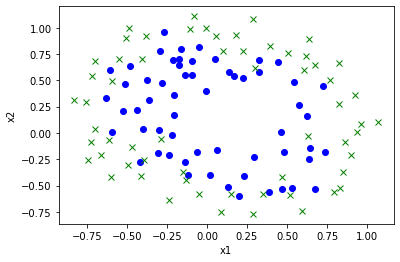

In [2]:
df = pd.read_csv('ex2data2.csv')
pos = np.array(df[df['y'] == 1])
neg = np.array(df[df['y'] == 0])

import matplotlib.pyplot as plt
plt.plot(pos[:,0],pos[:,1],'bo')
plt.plot(neg[:,0],neg[:,1],'gx')
plt.xlabel('x1')
plt.ylabel('x2')

## Using higher order features for classification like: ${x_1}$, ${x_2}$, ${x_1}^2$, ${x_2}^2$, ${x_1 x_2}$, ${x_1}^3$, ${x_2}^3$, ${x_1 {x_2}^2}$, ${x_1}^2{x_2}$ ...., ${x_2}^6$

In [3]:
# data is already close to normalized as :
print(np.mean(pos[:,1]),np.mean(pos[:,2]))
print(np.std(pos[:,1]),np.std(pos[:,2]))

0.18610025862068963 1.0
0.44193195456956325 0.0


In [7]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up
    to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1) # makes a column vector of inputs where 1st element is for bias 
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1) # without reshape they are in (n,) form 
            out= np.hstack((out,terms)) # to add elements adjacent to the vector
            #print(terms)
    return out

X = (np.array(df))
X = mapFeature(X[:,0], X[:,1],6)
print(X[0]) # contains x0 x1 x2 x3 ...  # for the first training example 
Y = np.array(df['y'])
Y = Y.reshape(len(Y),1)

[1.00000000e+00 5.12670000e-02 6.99560000e-01 2.62830529e-03
 3.58643425e-02 4.89384194e-01 1.34745327e-04 1.83865725e-03
 2.50892595e-02 3.42353606e-01 6.90798869e-06 9.42624411e-05
 1.28625106e-03 1.75514423e-02 2.39496889e-01 3.54151856e-07
 4.83255257e-06 6.59422333e-05 8.99809795e-04 1.22782870e-02
 1.67542444e-01 1.81563032e-08 2.47750473e-07 3.38066048e-06
 4.61305487e-05 6.29470940e-04 8.58939846e-03 1.17205992e-01]


#### NOTE : In the above code we have given the data to be from x0 which is 1 for bias term to be included in the data .  We could have avoided that so we will implement for both to show that it doesn't effect the data : 

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def LOGISTIC(X,Y,num_iter = 1000 , lr = 3):
    # No need to normalize as told 
    w = np.zeros((len(X[0]),1)) # since data is already in similar range we don' need to normalize 
    m = Y.shape[0]
    dj = []
    for i in range(num_iter+1):
        z = np.dot(X,w)
        h = sigmoid(z)
        cost = (-1/m)*np.sum(Y*np.log(h) + (1-Y)*np.log(1-h))
        dj.append(cost)
        dz = h - Y
        dw = (1/m)*np.dot(X.T,dz)
        w = w - lr*dw
        if i % 100 == 0:
            print('cost after',i,'iterations :',cost)
    return w,dj

In [10]:
w,cost = LOGISTIC(X,Y)

cost after 0 iterations : 0.6931471805599454
cost after 100 iterations : 0.3766415566991353
cost after 200 iterations : 0.35127823003664604
cost after 300 iterations : 0.34226250644998124
cost after 400 iterations : 0.33744492113271085
cost after 500 iterations : 0.3342596897854356
cost after 600 iterations : 0.3318861356984117
cost after 700 iterations : 0.3299907805913757
cost after 800 iterations : 0.32841272071622046
cost after 900 iterations : 0.3270630712410403
cost after 1000 iterations : 0.32588714460553275


[[ 3.86758636]
 [ 2.57698662]
 [ 4.41725624]
 [-5.38044654]
 [-5.72265629]
 [-6.91354433]
 [ 1.48276595]
 [-1.48567403]
 [ 0.27283297]
 [-1.20373228]
 [-4.83297079]
 [ 1.71687129]
 [-3.01325044]
 [-2.35973782]
 [-4.16377458]
 [-1.13615393]
 [-0.56053895]
 [ 1.97963743]
 [-2.35547375]
 [-2.34858126]
 [ 0.92972289]
 [-4.49503129]
 [ 1.07639312]
 [-1.14637851]
 [ 1.11914442]
 [-2.27226224]
 [-2.26018069]
 [-0.5182215 ]]


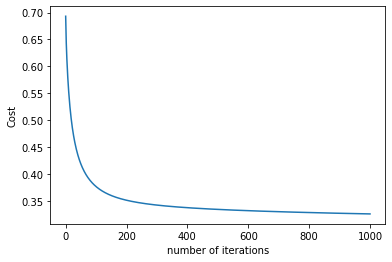

In [11]:
plt.plot(range(len(cost)),cost)
plt.xlabel('number of iterations')
plt.ylabel('Cost')
print(w)# first value of w will be the bias value for us 

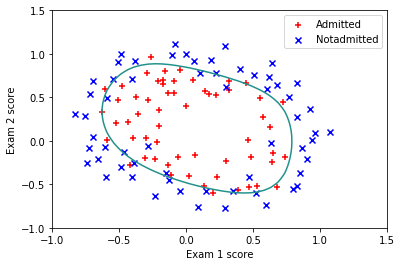

In [17]:
# plotting the decision boundary for the above result : 
plt.scatter(pos[:,0],pos[:,1],c="r",marker="+",label="Admitted")
plt.scatter(neg[:,0],neg[:,1],c="b",marker="x",label="Notadmitted")


def mapFeaturePlot(x1,x2,degree):
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms)) # forms an input feature for one example
    return out

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
# forming all the values for contour fitting:
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = np.dot(mapFeaturePlot(u_vals[i],v_vals[j],6) , w)

        
plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### Implementing the same thing with a little different vectorization to get more clarity on vector part

In [33]:
# implementing the same without using 1 as x0 in input vector 
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up
    to the given degree
    """
    out = 0
    for i in range(1,degree+1):
        for j in range(i+1):
            terms = (x1**(i-j) * x2**j).reshape(1,len(x1)) # without reshape they are in (n,) form 
            if type(out) == int :
                out = terms
                continue
            out = np.vstack((out,terms)) # to add elements adjacent to the vector
            #print(terms)
    return out

X = (np.array(df))
X = mapFeature(X[:,0], X[:,1],6)
print(X[1]) # contains x0 x1 x2 x3 ...  # for the first training example 
Y = np.array(df['y']).reshape(1,len(Y))

[ 0.69956   0.68494   0.69225   0.50219   0.46564   0.2098    0.034357
 -0.19225  -0.40424  -0.51389  -0.56506  -0.5212   -0.24342  -0.18494
  0.48757   0.5826    0.53874   0.81652   0.69956   0.63377   0.59722
  0.33406   0.005117 -0.27266  -0.39693  -0.60161  -0.53582  -0.53582
  0.54605   0.77997   0.96272   0.8019    0.64839   0.47295   0.31213
  0.027047 -0.21418  -0.18494  -0.16301  -0.41155  -0.2288   -0.18494
 -0.14108   0.012427  0.15863   0.26827   0.44371   0.52412   0.67032
  0.69225   0.57529   0.39985   0.55336   0.35599   0.17325   0.21711
 -0.016813 -0.27266   0.93348   0.77997   0.61915   0.75804   0.7288
  0.59722   0.50219   0.3633    0.27558   0.085526  0.012427 -0.082602
 -0.20687  -0.36769  -0.5212   -0.55775  -0.7405   -0.5943   -0.41886
 -0.57968  -0.76974  -0.75512  -0.57968  -0.4481   -0.41155  -0.25804
 -0.25804   0.041667  0.2902    0.68494   0.70687   0.91886   0.90424
  0.70687   0.77997   0.91886   0.99196   1.1089    1.087     0.82383
  0.88962   0.66301

In [34]:
def LOGISTIC(X,Y,num_iter = 1000 , lr = 3):
    # No need to normalize as told 
    w = np.zeros((X.shape[0],1)) # since data is already in similar range we don' need to normalize 
    b = 0
    m = Y.shape[1]
    dj = []
    for i in range(num_iter+1):
        z = np.dot(w.T,X) + b
        h = sigmoid(z)
        cost = (-1/m)*np.sum(Y*np.log(h) + (1-Y)*np.log(1-h))
        dj.append(cost)
        dz = h - Y
        dw = (1/m)*np.dot(X,dz.T)
        w = w - lr*dw
        b = b - lr*((1/m)*np.sum(dz))
        if i % 100 == 0:
            print('cost after',i,'iterations :',cost)
    return w,b,dj

In [35]:
w,b,cost = LOGISTIC(X,Y)

cost after 0 iterations : 0.6931471805599454
cost after 100 iterations : 0.3766415566991351
cost after 200 iterations : 0.3512782300366461
cost after 300 iterations : 0.3422625064499813
cost after 400 iterations : 0.3374449211327109
cost after 500 iterations : 0.3342596897854356
cost after 600 iterations : 0.33188613569841163
cost after 700 iterations : 0.3299907805913757
cost after 800 iterations : 0.32841272071622046
cost after 900 iterations : 0.3270630712410402
cost after 1000 iterations : 0.32588714460553275


Text(0, 0.5, 'Cost')

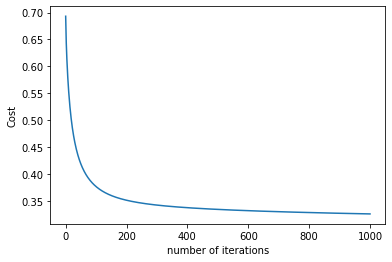

In [36]:
plt.plot(range(len(cost)),cost)
plt.xlabel('number of iterations')
plt.ylabel('Cost')
# print(b)
# print(w)
# we see that same values are predicted !!

No handles with labels found to put in legend.


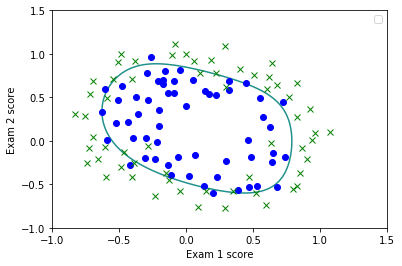

In [46]:
# plotting decision boundary for the above :
plt.plot(pos[:,0],pos[:,1],'bo')
plt.plot(neg[:,0],neg[:,1],'gx')
plt.xlabel('x1')
plt.ylabel('x2')

def plotdata(x1,x2,degree):
    out = 0
    k = 0
    for i in range(1,degree+1):
        for j in range(i+1):
            term = x1**(i-j) * x2**(j)
            if k == 0:
                out = term
                k = 1
                continue
            out = np.vstack((out,term))
    return out

u_vals = np.linspace(-1,1.5,100)
v_vals= np.linspace(-1,1.5,100)
z=np.zeros((len(u_vals),len(v_vals)))
# forming all the values for contour fitting:
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = np.dot(plotdata(u_vals[i],v_vals[j],6).T,w) + b

        
plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")

## hence verified for above that giving more features help in deduction
## Now using some regularization and seeing the effect on decision boundary

cost after 0 iterations : 0.6931471805599454
cost after 100 iterations : 0.5343000597830535
cost after 200 iterations : 0.5293583795060491
cost after 300 iterations : 0.5290341830434108
cost after 400 iterations : 0.5290061763582775
cost after 500 iterations : 0.5290031715752622
cost after 600 iterations : 0.5290027924545535
cost after 700 iterations : 0.5290027391950415
cost after 800 iterations : 0.5290027312008033
cost after 900 iterations : 0.5290027299517415
cost after 1000 iterations : 0.5290027297516592


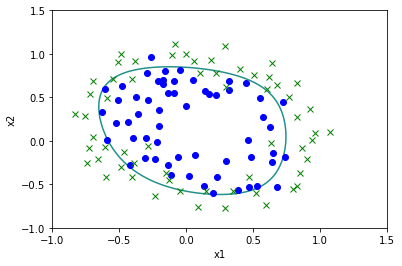

In [59]:
X = (np.array(df))
X = mapFeature(X[:,0], X[:,1],6)
#print(X[1]) # contains x0 x1 x2 x3 ...  # for the first training example 
#Y = np.array(df['y']).reshape(1,len(Y))

def LOGISTIC(X,Y,num_iter = 1000 , lr = 1,lamda = 1):
    # No need to normalize as told 
    w = np.zeros((X.shape[0],1)) # since data is already in similar range we don't need to normalize 
    b = 0
    m = Y.shape[1]
    dj = []
    for i in range(num_iter+1):
        z = np.dot(w.T,X) + b
        h = sigmoid(z)
        cost = (-1/m)*np.sum(Y*np.log(h) + (1-Y)*np.log(1-h)) + (lamda/(2*m))*np.sum(w**2)
        dj.append(cost)
        dz = h - Y
        dw = (1/m)*np.dot(X,dz.T) + (lamda/m)*(w)
        w = w - lr*dw
        b = b - lr*((1/m)*np.sum(dz))
        if i % 100 == 0:
            print('cost after',i,'iterations :',cost)
    return w,b,dj

w,b,cost = LOGISTIC(X,Y)
# plt.plot(range(len(cost)),cost)
# plt.xlabel('number of iterations')
# plt.ylabel('Cost')
# print(b)
# print(w)
# we see that same values are predicted !!

# plotting decision boundary for the above :
plt.plot(pos[:,0],pos[:,1],'bo')
plt.plot(neg[:,0],neg[:,1],'gx')
plt.xlabel('x1')
plt.ylabel('x2')

def plotdata(x1,x2,degree):
    out = 0
    k = 0
    for i in range(1,degree+1):
        for j in range(i+1):
            term = x1**(i-j) * x2**(j)
            if k == 0:
                out = term
                k = 1
                continue
            out = np.vstack((out,term))
    return out

u_vals = np.linspace(-1,1.5,100)
v_vals= np.linspace(-1,1.5,100)
z=np.zeros((len(u_vals),len(v_vals)))
# forming all the values for contour fitting:
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = np.dot(plotdata(u_vals[i],v_vals[j],6).T,w) + b

        
plt.contour(u_vals,v_vals,z.T,0)

Text(0, 0.5, 'Cost')

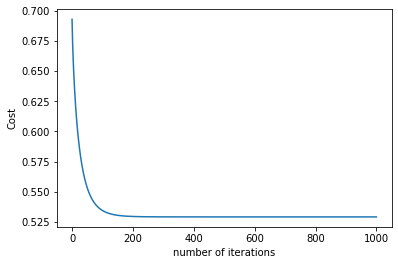

In [60]:
plt.plot(range(len(cost)),cost)
plt.xlabel('number of iterations')
plt.ylabel('Cost')